In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### For Regression Problem the Target Column in FWI.
As per Domain Knowledge columns of day, month and year are not required for the prediction of FWI. 

In [4]:
df.drop(columns=['day', 'month', 'year'], inplace=True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Encoding of Classes

In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

There are extra white spaces int the values of classes . eg 'fire' and 'fire ' are getting counted as different values. We need to remove these spaces

In [7]:
df['Classes'] = df['Classes'].str.strip()
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [8]:
## Making a map for data encoding
encoded = {
    'not fire' : 0,
    'fire' : 1
}

df['Classes'] = df['Classes'].map(encoded)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 22.9 KB


# Density plot of all columns

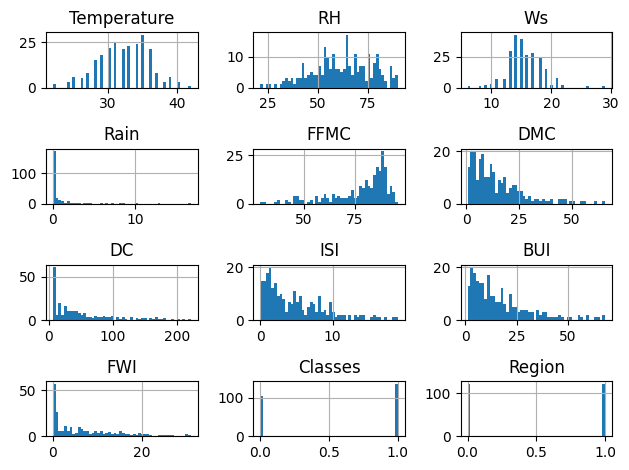

In [14]:
df.hist(bins = 50)
plt.tight_layout()

# Pie Chart for Classes

In [15]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [16]:
## Lets calculate the percentage of the value_counts()

classes_counts = df['Classes'].value_counts(normalize=True)*100
classes_counts

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x2649b192830>,
 [Text(-0.2189564657232264, 1.0779879712306597, '1'),
  Text(0.21895655996393085, -1.0779879520888727, '0')],
 [Text(-0.11943079948539621, 0.5879934388530871, '56.4%'),
  Text(0.11943085088941681, -0.5879934284121123, '43.6%')])

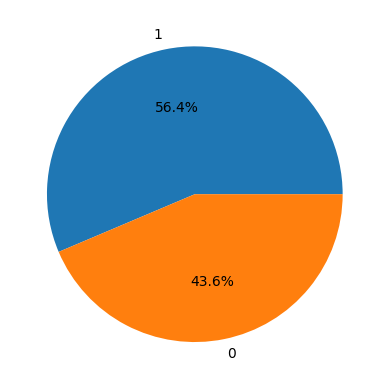

In [20]:
plt.pie(classes_counts, labels=classes_counts.index, autopct='%1.1f%%')
## autopct displays the percentage of sector in the pie chart

# Correlation

<Axes: >

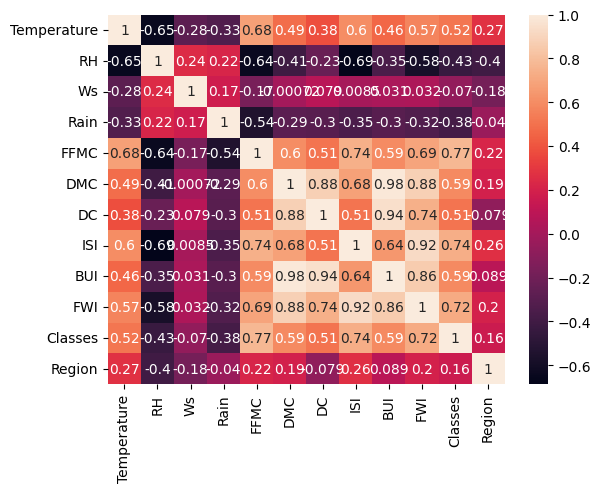

In [25]:
sns.heatmap(df.corr(), annot=True)

# Box plot of FWI

<Axes: ylabel='FWI'>

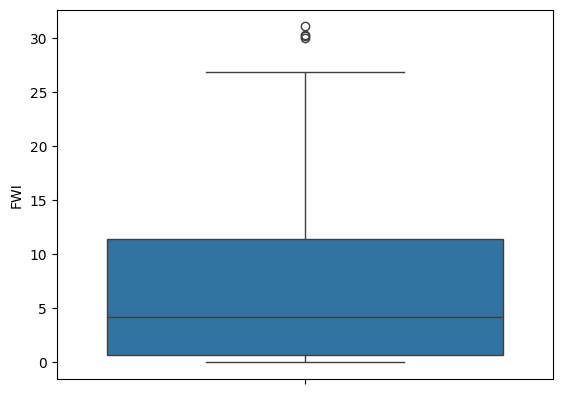

In [29]:
sns.boxplot(df['FWI'])

# Month Wise analysis of Fire

In [31]:
df_copy = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df_copy['Classes'] = df_copy['Classes'].str.strip()
df_copy.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
df_copy['month'].value_counts()

month
8    62
7    61
6    60
9    60
Name: count, dtype: int64

In [32]:
## Finding the month where fire is more

df_fire = df_copy[df_copy['Classes'] == 'fire']
df_fire['month'].value_counts()

month
8    51
7    38
6    25
9    23
Name: count, dtype: int64

<Axes: xlabel='month', ylabel='count'>

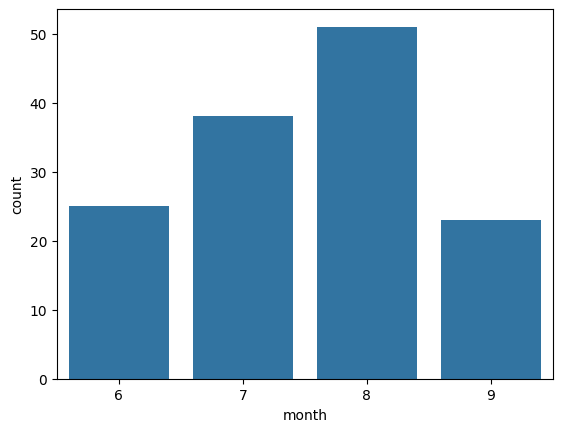

In [36]:
sns.countplot(x='month', data=df_fire)

In the 8th month fire was more